# Dataframes

Topics:
* Pandas
* Dataframes and series
* Selection: columns, rows by index versus by label, rows by conditions


Pandas is a most popular Python library for data science.

Pandas is similar to Excel.

A dataframe is a data structure.  It is similar to an Excel sheet.  It has columns and rows.  Columns can have names.  Rows can also have names.

In data science, we often deal with tabular data.  This is why pandas is very popular.

In [17]:
import pandas
iris = pandas.read_csv('../Datasets/iris.csv')

In [18]:
iris.sample(10)  # random data points

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
125,7.2,3.2,6.0,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor
128,6.4,2.8,5.6,2.1,virginica
69,5.6,2.5,3.9,1.1,versicolor
26,5.0,3.4,1.6,0.4,setosa
135,7.7,3.0,6.1,2.3,virginica
11,4.8,3.4,1.6,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


### Questions 

Question: how many data points are there?

In [19]:
len(iris)

150

Question: how many species are there?

+ view column Species
+ count the unique columns or compute count of each column value.

In [20]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Question: average petal length/width?

+ Select each column (a column is a "Series")
+ Select two columns.

In [22]:
iris['PetalLength'].mean()

3.7580000000000005

In [23]:
iris[['PetalLength','PetalWidth']].mean()

PetalLength    3.758000
PetalWidth     1.199333
dtype: float64

What is the difference between these?
+ `iris['PetalLength']`
+  `iris[['PetalLength']]`

In [24]:
iris[['PetalLength']]   # this is a dataframe

,PetalLength
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [25]:
iris['PetalLength']   # this is a series

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLength, Length: 150, dtype: float64

Question: What does the 10th data point look like?

In [26]:
iris.iloc[9]

SepalLength       4.9
SepalWidth        3.1
PetalLength       1.5
PetalWidth        0.1
Species        setosa
Name: 9, dtype: object

In [27]:
iris.iloc[9]['PetalWidth']

0.1

In [28]:
samples = iris.sample(25)
samples

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
127,6.1,3.0,4.9,1.8,virginica
12,4.8,3.0,1.4,0.1,setosa
124,6.7,3.3,5.7,2.1,virginica
96,5.7,2.9,4.2,1.3,versicolor
112,6.8,3.0,5.5,2.1,virginica
37,4.9,3.6,1.4,0.1,setosa
2,4.7,3.2,1.3,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica
123,6.3,2.7,4.9,1.8,virginica


* iloc selects the ith item.
* loc select the item with a specific label.

In [29]:
samples.iloc[5]  # the 6th item

SepalLength       4.9
SepalWidth        3.6
PetalLength       1.4
PetalWidth        0.1
Species        setosa
Name: 37, dtype: object

In [32]:
# select items with labels 29, 128, 51
samples.loc[[81,33,52]]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
81,5.5,2.4,3.7,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor


Question: What is the largest species, in terms sepal width?

We can:
+ separate the data into the species and calculate sepal widths for the species.
+ select each species data, and calculate the sepal widths.

At this point, we know how to select using indexes (`iloc`) or labels (`loc`).

We will learn how to select data with "queries".

In [ ]:
setosas = iris[(iris['Species'] == 'setosa')]
versicolor = iris[(iris['Species'] == 'versicolor')]
virginica = iris[(iris['Species'] == 'virginica')]


In [ ]:
setosas['PetalLength'].mean(), versicolor['PetalLength'].mean(), virginica['PetalLength'].mean()

In [ ]:
iris['Species'].unique()

"groupby":
1. We group the data based on a feature/column/variable, and then
2. We aggregate the data in each group in some way.


In [ ]:
iris.groupby('Species').mean()

We have two new techniques:
+ Constructing a query
+ Grouping data and aggregating data

**Exercise 1**

In [ ]:
#PID:2
# Load the "tips" dataset into a Pandas Data Frame. 
# Select the 'total_bill' and 'tip' columns using bracket notation. 
# Then, select the first 10 rows of the dataset using the .iloc method

Question:

In [ ]:
iris.groupby('Species').agg(['mean','std']).round(1)

In [ ]:
iris.sample(5)

Question: which features distinguish the species?

---

#### Exercise 2


In [33]:
#PID:3
#
# What is the average tip amount for each day?
#
import pandas
tips = pandas.read_csv('../Datasets/tips.csv')
tips.groupby('day')[['tip']].mean()

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


In [34]:
# this is the average tip amount
tips['tip'].mean()

2.99827868852459

#### Task

Asking for tip amounts does not exactly give us the answer we look for.

Tip percentage gives us more meaningful information.  How do we calculate this?

(this is "data transformation")

In [35]:
tips['tip_perc'] = ((tips['tip']/tips['total_bill']) * 100).round(1)
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_perc
48,28.55,2.05,Male,No,Sun,Dinner,3,7.2
31,18.35,2.50,Male,No,Sat,Dinner,4,13.6
105,15.36,1.64,Male,Yes,Sat,Dinner,2,10.7
151,13.13,2.00,Male,No,Sun,Dinner,2,15.2
106,20.49,4.06,Male,Yes,Sat,Dinner,2,19.8


In [36]:
tips.groupby('day')[['tip_perc']].mean().round(1)

,tip_perc
day,
Fri,17.0
Sat,15.3
Sun,16.7
Thur,16.1


What do we wnat to know about tips?

Questions (tip percentages):
* Which gender gives more tips?
* Do tips increase with party size?
* How do tips differ with different time (Dinner vs Lunch etc)?  (same technique as previous questions)
* Do smokers tip more? (same technique)
* Do people tip more when they spend more?

In [37]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_perc
64,17.59,2.64,Male,No,Sat,Dinner,3,15.0
214,28.17,6.50,Female,Yes,Sat,Dinner,3,23.1
129,22.82,2.18,Male,No,Thur,Lunch,3,9.6
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.7
92,5.75,1.00,Female,Yes,Fri,Dinner,2,17.4


#### Exercise 3

In [38]:
#PID:4
#
# Which gender gives more tips?
#
print(tips.groupby('sex')[['tip_perc']].agg(['mean','count']))
print('In general, females give a little more tip.')


# Do tips increase with party size?
print(tips.groupby('size')[['tip_perc']].mean())
print('No, tips do not increase with party size.')

         tip_perc      
             mean count
sex                    
Female  16.649425    87
Male    15.766879   157
In general, females give a little more tip.
       tip_perc
size           
1     21.750000
2     16.573077
3     15.223684
4     14.586486
5     14.160000
6     15.625000
No, tips do not increase with party size.


In [39]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_perc
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.8
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.6
29,19.65,3.00,Female,No,Sat,Dinner,2,15.3
150,14.07,2.50,Male,No,Sun,Dinner,2,17.8
134,18.26,3.25,Female,No,Thur,Lunch,2,17.8


In [40]:
print(tips.groupby('sex')[['tip_perc']].mean())


         tip_perc
sex              
Female  16.649425
Male    15.766879


Question: Do people tip more when they spend more?

We will need to see the relationship between total_bill and tip_perc.

In [41]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_perc      float64
dtype: object

In [42]:
import seaborn
from matplotlib import pyplot

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


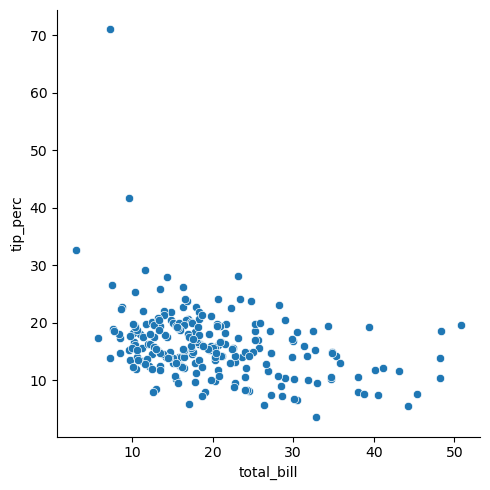

In [43]:
seaborn.relplot(data=tips, x='total_bill', y='tip_perc')
pyplot.show()

In [44]:
print(tips.groupby('sex')[['tip_perc']].agg(['mean','count']))
print('In general, females give a little more tip.')


         tip_perc      
             mean count
sex                    
Female  16.649425    87
Male    15.766879   157
In general, females give a little more tip.
